# Сборный проект - 1 "Анализ продаж компьютерных игр"

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

# Описание данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

    Данные за 2016 год могут быть неполными.

In [1]:
# загрузка библиотек
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np

import math 

from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

# Обзор данных

In [2]:
# импортируем данные
# Импорт данных из csv-файла
try:
   df = pd.read_csv('/datasets/games.csv')
except:
   df = pd.read_csv('C:/Users/Марина/Documents/Онлайн курсы/!Яндекс.Практикум/Сборный проект 1/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#обзор количества ненулевых значений в столбцах и типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Количество пропущенных значений в каждом столбце
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Просмотр количества дублирующихся строк
df.duplicated().sum()

0

In [7]:
# просмотр количества уникальных значений в столбце с названием игр
len(df['Name'].unique())

11560

In [8]:
df['Name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

Некоторые наименования начинаются с пробела.

Всего 11560 наименований, а строк в датафрейме всего 16715. Вызовем строки с дублирующимися наименованиями игр.

In [9]:
df[df['Name'].duplicated()].sort_values('Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
3304,pro evolution soccer 2011,X360,2010.0,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
4664,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


Наличие дублирующихся наименований игр связано с тем, что одна и та же игра могла выйти сразу на нескольких платформах.

In [10]:
# Вызов строк с пропуском в названии игр
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Вызов списка уникальных зачений в столбце с названиями платформ
df['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
# Вызов количества платформ в датафрейме
len(df['Platform'].unique())

31

In [13]:
# Вызов списка уникальных значений в столбце с жанрами
df['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [14]:
#  Вызов списка уникальных значений в столбце с пользовательскими оценками
df['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [15]:
# Вызов показателей описательной статистики
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод по результатам обзора данных
По результатам предварительного обзора данных можно выделить следующие задачи по их предобработке:
1. Переименование столбцов на названия со строчными символами.
2. Изменение типа данных:
    * в столбце года релиза `Year_of_Release` на `int`;
    * в столбце `User_Score` на `float`.
3. По возможности заполнение пропусков в столбцах. Пропуски обнаружены в пяти столбцах: `Name`, `Critic_Score`,`User_Score` и `Rating`.

# Предобработка данных

## Изменение названий столбцов

In [16]:
# Запишем названия столбцов строчными буквами методом map()
df.columns = map(str.lower, df.columns)

In [17]:
# проверка
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4563,"Barbie: Jet, Set & Style!",DS,2011.0,Misc,0.34,0.05,0.0,0.03,NaN,NaN,NaN


## Обработка пропусков

### Пропуски года выпуска

Вызовем срез данных, где не указан год выпуска.

In [18]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Многие названия игр содержат указание года. Эту информацию можно использовать для заполнения пропусков.
Как правило, если в названии игры указан год, то релиз игры происходит в предыдущий год от указанного. К примеру релиз Madden NFL 2004 состоялся 12 августа 2003. Поэтому играм с годом в названии укажем год, указанный в названии минус 1.

Для начала нужно из названия игры убрать другие символы кроме числовых.

In [19]:
# запишем список индексов игр, где не указан год релиза
no_year_names = df[df['year_of_release'].isna()]['name'].index

In [20]:
# Вызовем наименования игр, для которых не указан год выпуска и запишем в список только числовые символы и названия
# Методом replace() все символ, за исключением числовых, заменяем на пустые значения ""
no_year = df[df['year_of_release'].isna()]['name'].replace(r"[^\d]", "", regex=True)

In [21]:
# Заменим полученные значения на целые числа
no_year = no_year.drop(no_year[no_year == ''].index).astype('int64')

In [22]:
# Вызовем полученные список значений
no_year.unique()

array([2004, 2006,    3,   99,   57, 2003,    2,    4,    7, 2009,   11,
          6, 2002, 2013, 2005,  500,   26,   20,   64, 2011,   28,    5,
       2008, 2007,  148], dtype=int64)

Не все числовые значения в названии были годом. Поэтому будем использовать только значения больше 2000, что очевидно является указанием года.

In [23]:
# Заменяем пропуски в годах полученными значениями за вычетом 1
df.loc[df['year_of_release'].isna(), 'year_of_release'] = no_year[no_year > 2000].apply(lambda x: x-1)

In [24]:
# Для проверки вызываем срез данные по списку индексов
df.iloc[no_year_names]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,2007.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Пропуски в 'User_Score'

В столбце с оценкой пользователей есть значения с аббревиатурой 'tbd'. Аббревиатура 'tbd' расшифровывается как 'to be decided' или 'to be determined', то есть значение, которое следует определить (уточнить). В нашем случае, 'tbd' равноценно NaN. Поэтому заменим 'tbd' на NaN.

In [25]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)

Так как дата выпуска игры имеет существенное значение для последующего анализа удалим строки, где есть пропуски года выпуска, а также 2 строки с пропуском в наименовании и жанре игры.

In [26]:
df = df.dropna(subset=['year_of_release','name'])

Напоследок уберем пробелы в начале и в конце наименования игр.

In [27]:
df['name'] = df['name'].str.strip(' ')

In [28]:
# Вызов количества пропусков после предобработки
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
dtype: int64

Остались пропуски в столбцах с оценками критиков и пользователей, а также с рейтингом игры.  Данные пропуски заполнить невозможно, т.к. доступные способы заполнения пропусков (заполнение средними значениями и т.п.) приведет к искажению данных.   

## Преобразование типов данных

In [29]:
# Замена типов данных столбца 'year_of_release' с float на int.
df['year_of_release'] = df['year_of_release'].astype('int64')

In [30]:
# Замена типов данных столбца 'user_score' с object на float.
df['user_score'] = df['user_score'].astype('float64')

In [31]:
# Вызов типов данных столбцов датафрейма
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Расчет суммарных продаж во всех регионах

Добавим в датафрейм столбец `total_sales` с суммой продаж по всем регионам.

In [32]:
df['total_sales'] = df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [33]:
# Вызов нескольких случайных строк датафрейма для проверки преобразований
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4174,Dragon Age Origins: Awakening,X360,2010,Role-Playing,0.33,0.10,0.00,0.04,NaN,NaN,NaN,0.47
5712,Digimon World: Dawn / Dusk,DS,2007,Role-Playing,0.12,0.00,0.18,0.01,NaN,NaN,NaN,0.31
444,Rhythm Heaven,DS,2008,Misc,0.55,0.50,1.93,0.13,83.0,9.0,E,3.11
11125,Dora's Big Birthday Adventure,DS,2010,Misc,0.08,0.01,0.00,0.01,NaN,NaN,E,0.10
4122,Up,PS2,2009,Action,0.19,0.05,0.00,0.24,NaN,NaN,E,0.48


### Вывод по результатам предобработки данных
В результате обзора данных выполнены следующие преобразования:
* изменены названия столбцов на строчные символы;
* частично заполнены пропуски в годе выпуска игр (столбец `year_of_release`) по наименованию игры;
* удалены строки, где не указаны год выпуска и жанр игры;
* изменены типы данных в столбцах `year_of_release` и `user_score`;
* в таблицу добавлен столбец `total_sales` с суммарными продажами.

# Исследовательский анализ данных

## Анализ выпуска игр по годам
Посмотрим, сколько игр выпускалось в разные годы. Для этого построим диаграмму распределения количества значений по годам.

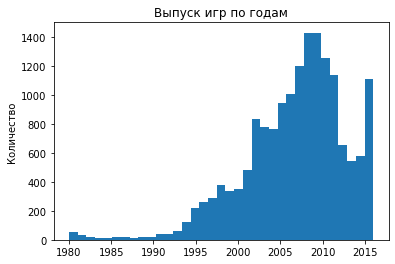

In [34]:
plt.hist(data=df, x='year_of_release', histtype='barstacked', bins=35)
plt.title("Выпуск игр по годам")
plt.ylabel('Количество')
plt.show()

На гистограмме заметен рост количества выпускаемых игр с 1995 года, когда ежегодно выпукаслось более 200 игр в год.

Исследуемый период - выход более 200 игр в год: 1995-2016 гг.

In [35]:
# Отфильтруем данные с 1995 года
df_rel_years = df.copy()
df_rel_years = df_rel_years.query('year_of_release >= 1995')

## Анализ продаж по платформам

Рассчитаем суммарные продажи игр для каждой платформы за анализируемый период.

In [36]:
platform_total_sales = (df_rel_years
                        .groupby('platform')[['total_sales']]
                        .sum()
                        .sort_values('total_sales', ascending=False)
                        .reset_index()
                       )

In [37]:
platform_total_sales

,platform,total_sales
0,PS2,1248.12
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.77
5,PS,721.55
6,PS4,314.14
7,GBA,312.88
8,PSP,290.34
9,3DS,257.81


Запишем список платформ с наибольшими суммарными платформами.

In [38]:
top_platforms = platform_total_sales.loc[:9,'platform']
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9     3DS
Name: platform, dtype: object

In [39]:
# Запишем датафрейм с данными топ-10 платформ по продажам
top_platforms_df = df_rel_years.query('platform in @top_platforms')

Построим график изменения продаж популярных платформ по годам.

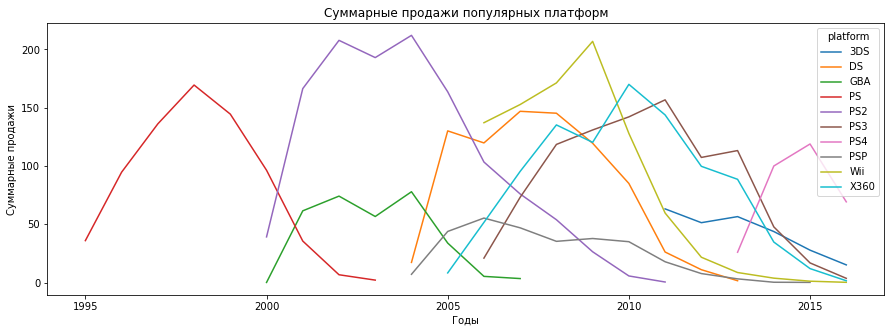

In [40]:
ax = top_platforms_df.pivot_table(index='year_of_release', 
                             columns='platform', 
                             values='total_sales', 
                             aggfunc='sum').plot(figsize=(15,5))
ax.set_title('Суммарные продажи популярных платформ')
ax.set_xlabel('Годы')
ax.set_ylabel('Суммарные продажи')
plt.show()

Как видно из графика характерный срок, когда появляются новые и исчезают старые платформы, составляет пять лет.\
Исходя из полученной информации построим график суммарных продаж по всем платформам за 2011 - 2015 годы (2016 год исключаем, т.к. данные за 2016 год неполные), для того чтобы определить игры для каких платформ будут популярны в 2017 году.

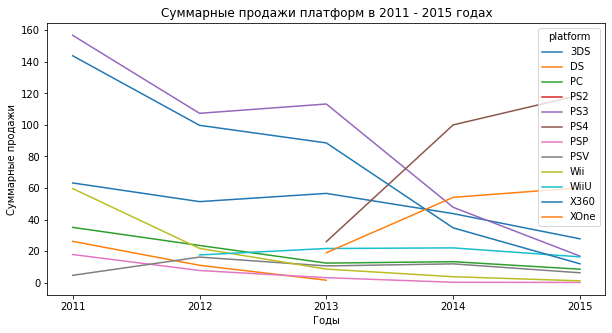

In [41]:
ax = df.query('2010 < year_of_release <= 2015').pivot_table(index='year_of_release', 
                             columns='platform', 
                             values='total_sales', 
                             aggfunc='sum').plot(figsize=(10,5))
ax.set_title('Суммарные продажи платформ в 2011 - 2015 годах')
ax.set_xticks([2011, 2012, 2013, 2014, 2015])
ax.set_xlabel('Годы')
ax.set_ylabel('Суммарные продажи')
plt.show()

C 2011 по 2015 год наблюдается спад продаж по всем платформам, который стал более заметен с появления в 2013 году платформ PS4 и XOne. На фоне падения продаж всех других платформ PS4 и XOne с 2013 года набирают популярность. Учитывая, что «жизненный цикл» платформы (с момента появления до значительного спада продаж) составляет пять лет, то к 2017 году PS4 и XOne еще сохранят прибыльность.

С появления в 2013 году платформ PS4 и Xone продажи игр для остальных платформ падают. Особенно заметен спад популярности платформ PS3 и X360. 

In [42]:
top_new_platforms = ['PS4', 'XOne']

In [43]:
persp_platforms_df = df_rel_years.copy()
persp_platforms_df = persp_platforms_df.query('platform in @top_new_platforms')

## Графики «ящик с усами» по глобальным продажам игр в разбивке по платформам PS4 и XOne

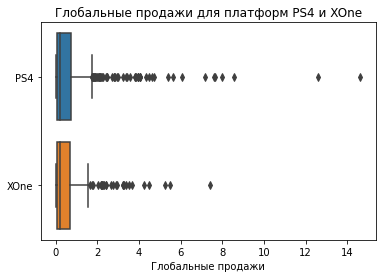

In [44]:
ax = sns.boxplot(data=persp_platforms_df, y='platform', x='total_sales', orient='h')
ax.set_title('Глобальные продажи для платформ PS4 и XOne')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel(None)
plt.show()

In [45]:
persp_platforms_df.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [46]:
persp_platforms_df.query('total_sales > 2').groupby('platform')[['name']].count()

,name
platform,
PS4,44
XOne,24


Проанализируем результаты графиков boxplot для платформ PS4 и XOne. Правый «ус» каждого графика находится около значения в 2 миллиона копий. Отсюда можно сделать вывод, что продажи большинства выпускаемых игр для обеих платформ находятся в пределах 2 миллионов копий. Но для каждой из платформ есть несколько десятков игр, продажи которых график характеризует как выбросы, т.е. продажи этих намного больше продаж основной массы, выпускаемых для каждой платформы игр. Причем для PS4 выпущено почти в 2 раза больше успешных по продажам игр – 44 игры, в то время как для XOne – 24 игры. К примеру, продаваемые среди рассматриваемых платформ игры Call of Duty: Black Ops 3 и Grand Theft Auto V, с продажами более 12 млн копий, выпускались на платформе PS4.

## Оценка влияния на продажи отзывы пользователей и критиков 

Посмотрим, как влияют на продажи отзывы пользователей и критиков на примере платформы XOne. Для этого построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

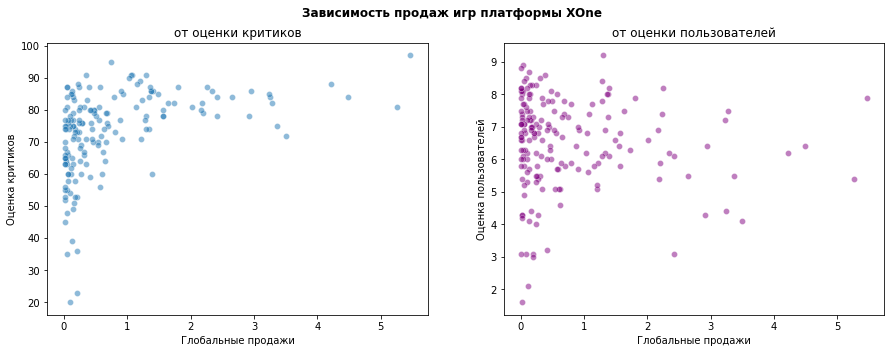

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='total_sales', 
                y='critic_score',
                alpha=0.5,
                data=persp_platforms_df.query('platform == "XOne"'),
                sizes=(20,5),
                ax=axs[0]
                )
sns.scatterplot(x='total_sales', 
                y='user_score',
                alpha=0.5,
                data=persp_platforms_df.query('platform == "XOne"'),
                sizes=(20,5),
                ax=axs[1],
                color='purple'
                )
fig.suptitle(t='Зависимость продаж игр платформы XOne', fontweight='bold')
axs[0].set_title('от оценки критиков')
axs[1].set_title('от оценки пользователей')
axs[0].set_xlabel('Глобальные продажи')
axs[1].set_xlabel('Глобальные продажи')
axs[0].set_ylabel('Оценка критиков')
axs[1].set_ylabel('Оценка пользователей')
plt.show()

In [48]:
persp_platforms_df.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Диаграмма рассеяния для параметров значений глобальных продаж игр и отзывов критиков показывает, что как правило игры с высокими продажами (от 2 млн копий) имеют высокие оценки критиков (более 70), на основании чего можно предположить о наличии взаимосвязи продаж игры от оценки критиков – «чем выше оценка критиков, тем выше продажи».
Что касается оценки пользователей, то диаграмма рассеяния не позволяет сделать аналогичные выводы. К примеру, для игр с большими продажами оценки пользователей далеко не самые высокие (от 3 до 8). В то же время для игр с высокими оценками пользователей (более 8) продажи не самые большие (до 1 млн копий).
Выводы подтверждаются значением коэффициента корреляции Пирсона. Для оценки критиков и продаж коэффициент равен 0,42 (не самая тесная взаимосвязь, но и сделать вывод об отсутствии взаимосвязи тоже нельзя), а значение коэффициента для оценки зависимости продаж с оценками пользователей составляет -0,07, что означает практически отсутствие взаимосвязи.


Посмотрим, как соотносятся сделанные выводы о продажах игр на платформах PS4 и XOne c продажами игр на других платформах.
Построим «ящик с усами» для глобальных продаж топ-10 платформ.

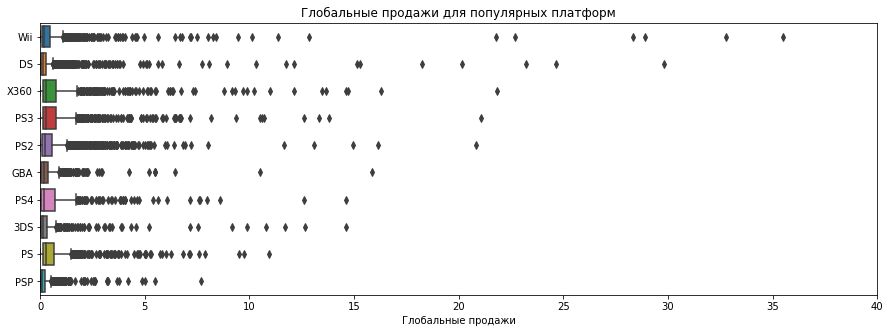

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=top_platforms_df, y='platform', x='total_sales', orient='h')
ax.set(xlim=(0, 40))
ax.set_title('Глобальные продажи для популярных платформ')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel(None)

plt.show()

Также построим диаграммы рассеяния для оценки зависимости глобальных продаж топ-5 платформ от оценок критиков и пользователей.

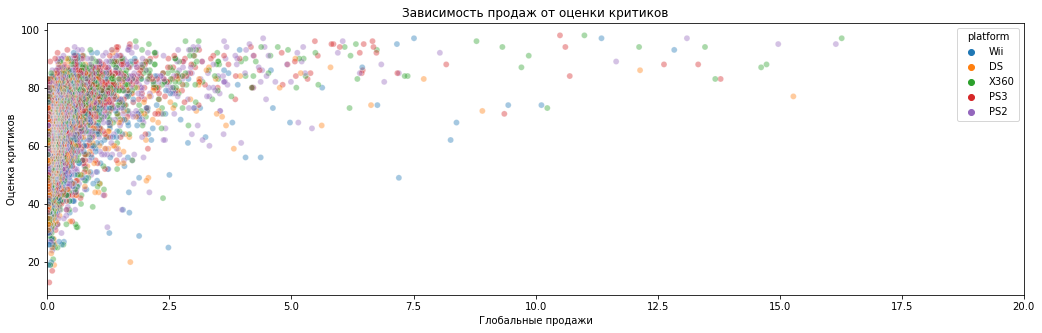

In [50]:
fig, ax = plt.subplots(figsize=(17.5, 5))
top_5_platforms = top_platforms.iloc[:5]
ax = sns.scatterplot(x='total_sales', 
                y='critic_score',
                hue='platform',
                alpha=0.4,
                data=top_platforms_df.query('platform in @top_5_platforms'),
                sizes=(20,5)
            )
ax.set(xlim=(0, 20))
ax.set_title('Зависимость продаж от оценки критиков')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Оценка критиков')

plt.show()

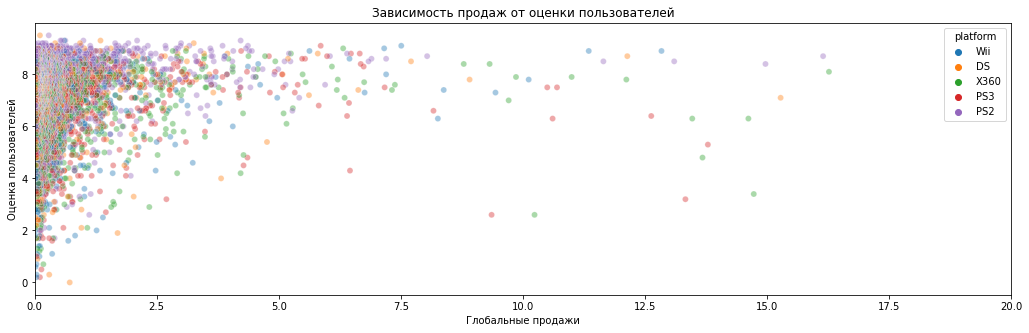

In [51]:
fig, ax = plt.subplots(figsize=(17.5, 5))
top_5_platforms = top_platforms.iloc[:5]
ax = sns.scatterplot(x='total_sales', 
                y='user_score',
                hue='platform',
                alpha=0.4,
                data=top_platforms_df.query('platform in @top_5_platforms'),
                sizes=(20,5)
            )
ax.set(xlim=(0, 20))
ax.set_title('Зависимость продаж от оценки пользователей')
ax.set_xlabel('Глобальные продажи')
ax.set_ylabel('Оценка пользователей')

plt.show()

Выводы, основанные на анализе глобальных продаж платформ PS4 и XOne, справедливы и для других платформ. Для них так же характерно распределение игр по продажам с большим количеством «выбросов», т.е. игр которые действительно достигли высокого уровня продаж немного относительно общего количества выпускаемых для платформы игр. 
Так же для платформ характерно то, что игры с большими продажами имеют высокие оценки критиков. Оценки пользователей имеют бóльший разброс для игр с высокими продажами. 

## Общее распределение игр по жанрам 

Для оценки распределения игр по жанрам сгруппируем датафрейм по жанру и посчитаем сумму продаж для каждого жанра. По полученным значениям построим график.

In [52]:
# считаем суммарные глобальные среди всех платформ продажи игр по жанрам 
df_rel_years.groupby('genre').agg({'total_sales': ['count','sum']}).sort_values(('total_sales', 'sum'), ascending=False)

total_sales         
                   count      sum
genre                            
Action              3223  1645.42
Sports              2251  1270.85
Shooter             1247   967.94
Role-Playing        1434   888.47
Misc                1701   773.67
Racing              1206   693.72
Platform             808   611.83
Fighting             793   405.57
Simulation           842   379.12
Adventure           1280   210.25
Strategy             658   166.88
Puzzle               533   158.37

In [53]:
# Для каждого жанра считаем долю в общем количестве выпускаемых игр и долю в суммарных глобальных продажах
genre_count_share = df.groupby('genre').agg({'total_sales': 'count'}) / len(df) * 100
genre_count_share = np.round(genre_count_share, decimals=1)

In [54]:
genre_sum_share = df.groupby('genre').agg({'total_sales': 'sum'}) / df['total_sales'].sum() * 100
genre_sum_share = np.round(genre_sum_share, decimals=1)

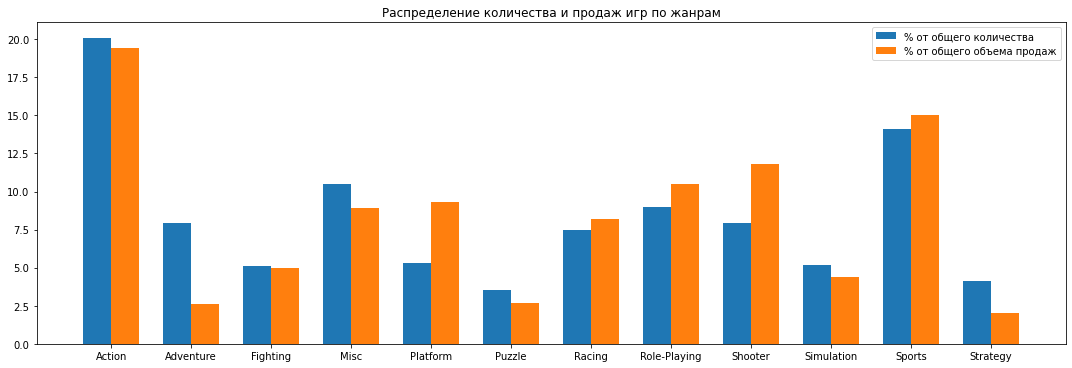

In [69]:
labels = genre_count_share.index
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(15,5))
width = 0.35
rects1 = ax.bar(x - width/2, genre_count_share['total_sales'], width, label='% от общего количества')
rects2 = ax.bar(x + width/2, genre_sum_share['total_sales'], width, label='% от общего объема продаж')

#ax.bar_label(rects1, padding=3) в JupyterHub приводит к ошибке
#ax.bar_label(rects2, padding=3)
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

ax.set_title('Распределение количества и продаж игр по жанрам')

plt.show()

Самые распространённым жанром является Action (20% от общего количества выпущенных игр) - каждая пятая выпускаемая игра является игрой в жанре Action. Игры этого жанра также лидируют по количеству проданных копий (19,4% от общего числа). Следующими по популярности жанрами являются Sports (14,1% от количества выпущенных игр, 15% проданных копий) и Misc (14,1% от количества выпущенных игр, 15% проданных копий). По 7,9% от общего количества выпущенных игр занимают жанры Adventure и Shooter, однако доли в продажах у них значительно отличаются, для Adventure доля проданных копий составляет всего 2,6% от общего числа продаж, а для жанра Shooter – 11,8%. 

### Вывод по результатам исследовательского анализа
1.  В ходе исследовательского анализа за анализируемый период принят период с 1995 по 2016 год, период за который выходило более 200 игр в год.
2. По результатам суммарных продаж определены топ-10 платформ, продажи игр для которых за анализируемый период были наибольшими. Для каждой платформы построен график изменения суммарных продаж по годам. Определено, что характерный срок, когда появляются новые и исчезают старые платформы, составляет пять лет.
3. По результатам анализа пятилетнего интервала 2011-2015 годов определены потенциально прибыльные платформ на ближайшую перспективу платформы - платформы PlayStation 4 (PS4) и Xbox One (XOne).
4. Для каждой из платформ характерны следующие особенности:
    * не все выпускаемые игры для плафтормы одинаково успешны в продажах, самые успешые по продажам игры могут в несколько раз превосходить продажи игр, составлящих более 90% от общего количества выпускаемых для платформы игр;
    * как правило игры с наибольшими продажами высоко оценены критиками.
5. Самым популярным жанром игр является Action - каждая пятая выпускаемая игра выполнена в жанре Action. Также популярный жанры Sports и Shooter.


# Портрет пользователя каждого региона

Охарактеризуем, как отличаются продажи в зависимости от региона – Северная Америка, Европа и Япония.

## Самые популярные платформы (топ-5)

Построим для каждого региона график с топ-5 популярными платформами. Оцениваемый параметр будет доля продаж каждой платформы в общей сумме проданных копий в регионе.

In [56]:
# Список исследуемых столбцов
sales_col = ['na_sales', 'eu_sales', 'jp_sales']

In [57]:
# Запишем функцию для расчета топ-5 значений по доле продаж в зависимости от выбранного параметра
def top_5(col, sales_col):
    return (df_rel_years
    .query('year_of_release >= 2011')
     .groupby(col)[[sales_col]]
     .sum()
     .apply(lambda x: np.round(x/sum(x)*100, decimals=1))
     .sort_values(sales_col,ascending=False)
     .iloc[:5]        
)

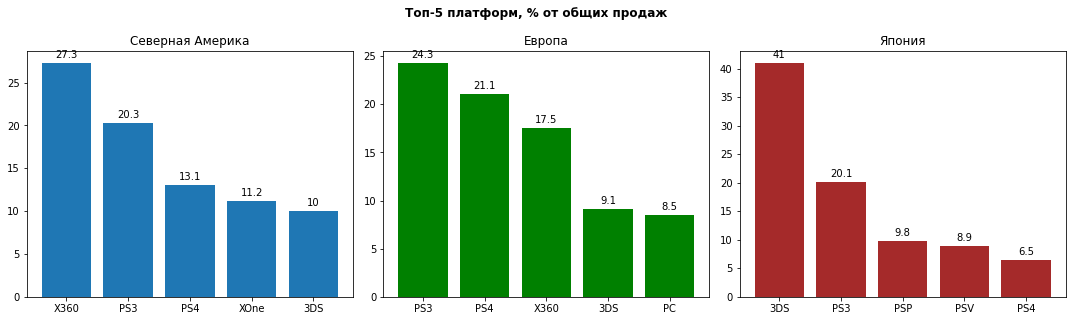

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4.5))

pl_1 = top_5('platform', 'na_sales'), "Северная Америка"
pl_2 = top_5('platform', 'eu_sales'), "Европа"
pl_3 = top_5('platform', 'jp_sales'), "Япония"

pl_ax1 = ax1.bar(x=pl_1[0].index, height=pl_1[0]['na_sales'], data=pl_1[0])
pl_ax2 = ax2.bar(x=pl_2[0].index, height=pl_2[0]['eu_sales'], data=pl_2[0], color='green')
pl_ax3 = ax3.bar(x=pl_3[0].index, height=pl_3[0]['jp_sales'], data=pl_3[0], color='brown')

#ax1.bar_label(pl_ax1, padding=3)
#ax2.bar_label(pl_ax2, padding=3)
#ax3.bar_label(pl_ax3, padding=3)
fig.suptitle(t="Топ-5 платформ, % от общих продаж", fontweight='bold')
ax1.set_title(pl_1[1])
ax2.set_title(pl_2[1])
ax3.set_title(pl_3[1])

fig.tight_layout()
plt.show()

В каждом из исследуемых регионов свой лидер по количеству проданных копий игр за период с 2011 по 2016 г. \
Хотя в Северной Америке тройку лидеров составляют одни и те же платформы: X360, PS3 и PS4. 
В Северной Америке лидер по продажам игр - это платформа X360 (27,3%), на втором месте платформа PS3 (20,3%), на третьем месте PS4 (13,1%). В Европе лидером по количеству проданных копий игр является платформа PS3 (24.3%), на втором месте - PS4 (21,1%), на третьем – X360 (17,5%). \
Данные о топ-5 платформах в Японии кардинально отличаются, здесь с большим отрывом лидирует платформа Nintendo 3DS(41% проданных игр), в то время как в Северной Америке она замыкает пятерку лидеров, а в Европе находится на четвертом месте. На втором месте в Японии платформа PS3 (20,1%), на третьем - PSP (9,8%). Примечательно, что в других регионах PSP вообще не вошла в топ-5 платформ, а X360 не вошла в топ-5 платформ в Японии.

## Самые популярные жанры (топ-5)

Теперь построим для каждого региона график с топ-5 популярными жанрами игр.

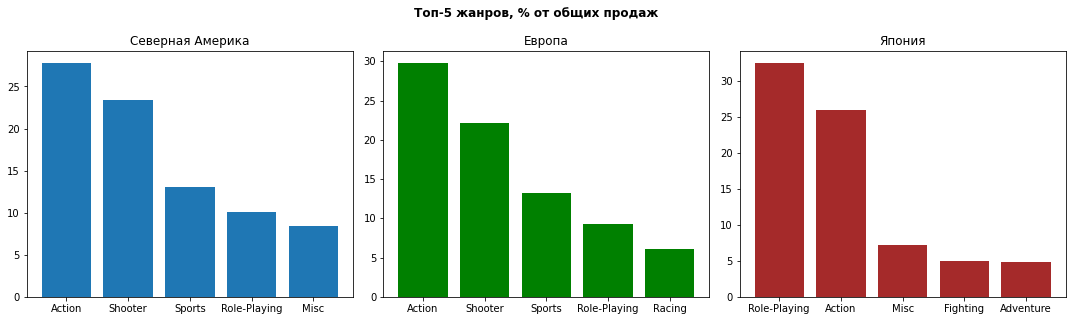

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4.5))

pl_1 = top_5('genre', 'na_sales'), "Северная Америка"
pl_2 = top_5('genre', 'eu_sales'), "Европа"
pl_3 = top_5('genre', 'jp_sales'), "Япония"

pl_ax1 = ax1.bar(x=pl_1[0].index, height=pl_1[0]['na_sales'], data=pl_1[0])
pl_ax2 = ax2.bar(x=pl_2[0].index, height=pl_2[0]['eu_sales'], data=pl_2[0], color='green')
pl_ax3 = ax3.bar(x=pl_3[0].index, height=pl_3[0]['jp_sales'], data=pl_3[0], color='brown')

#ax1.bar_label(pl_ax1, padding=3)
#ax2.bar_label(pl_ax2, padding=3)
#ax3.bar_label(pl_ax3, padding=3)
fig.suptitle(t='Топ-5 жанров, % от общих продаж', fontweight='bold')
ax1.set_title(pl_1[1])
ax2.set_title(pl_2[1])
ax3.set_title(pl_3[1])

fig.tight_layout()
plt.show()

Что касается выбора жанров, то снова наблюдается солидарность пользователей из Северной Америки и Европы. Причем в этих двух регионах предпочтения пользователей распределилось одинаковым образом: на первом месте по популярности игры жанра Action (27,8% в Северной Америке и 29,8% в Европе), на втором месте - жанр Shooter (23,4% в Северной Америке и 22,1% в Европе), и на третьем месте - жанр Sports (27,8% в Северной Америке и 29,8% в Европе). \
Жанровые предпочтения японских пользователей отличаются от североамериканских и европейских пользователей, здесь самый популярный жанр - Role-Playing (32,5% игр). Жанр Action в Японии тоже достаточно популярен - 25,9% покупаемых игр. На третьем месте с большим отрывом - жанр Misc (7,2%).

## Оценка влияния рейтинга ESRB на продажи

Посмотрим, как влияет рейтинг ESRB на продажи.

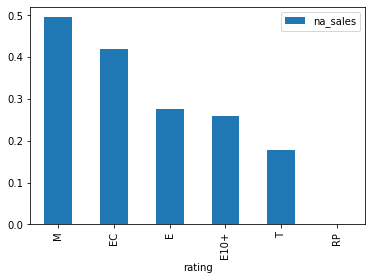

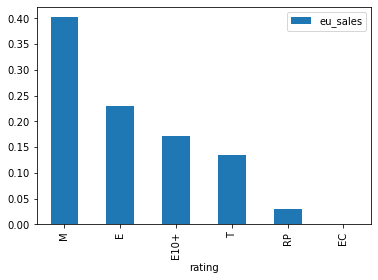

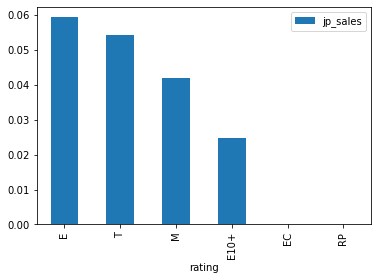

In [60]:
# Циклом построим графики для продаж игр, которым присвоен тот или иной рейтинг
for col in sales_col:
    (df_rel_years
     .query('year_of_release >= 2011')
     .pivot_table(index='rating',values=col)
     .sort_values(col,ascending=False)
     .plot(kind='bar')
    )
    plt.show()

Расшифровка обозначения рейтинга (по данным [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)):
* **М** ("Mature") - для взрослых (17+)
* **T** ("Teens") - для подростков (13+)
* **E** ("Everyone") - для всех возрастов
* **EC** ("Early childhood") — для детей младшего возраста
* **E10+** ("Everyone 10 and older") — для всех от 10 лет и старше
* **RP** ("Rating Pending») — рейтинг ожидается.

Если распределить продажи игр по присвоенным им рейтингам, то можно увидеть, что в Северной Америке и Европе наибольшие продажи имеюи игры для взрослых с рейтингом М. В Японии больше остальных продаж приносят игры, подходящие всем возрастам, с рейтингом Е.

### Вывод по результатам анализа пользователей разных регионов

В ходе анализа по количеству проданных экземеляров игр в разрезе игровых платформ и жанров определено, что предпочтения пользователей Северной Америки и Европы во многом схожи. И в том и в другом регионе в 2011-2015 годах были наболее популярны одни и те же игровые платформы - Xbox 360, PlayStation 3 и PlayStation 4. Также схожи жанровые предпочтения североамериканских и европейских пользователей: и те, и другие предпочитают жанры Action, Shooter и Sports. В обоих регионах по продажам лидируюи игры для возрастной категории 17+ (рейтинг М по классификации ESRB).\
Что касается пользователей из Японии, то там по продажам копий лидируют другие платформы и жанры, чем в Северной Америке и Европе. В целом в Японии большую популярность имеют портативные платформы. Самой популярной игровой плаформой в 2011 - 2016 здесь была портативная консоль Nintendo 3DS, которая в 2 раза обошла по продажам PlayStation 3. В тройку лидеров здесь вошла также PlayStation Portable, которой не было в топ-5 платформ в Северной Америке и Европе. Среди жанров японские пользователей предпочитают ролевые игры (Role-Playing). Наиболее продавамые игры в Японии не имеют возрастных ограничений (рейтинг E).

# Проверка гипотез

## Гипотеза:1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для того, чтобы проверить равенство cредних пользовательские рейтинги двух выборок, проведем проверку статистической гипотезы о равенстве двух средних значений независимых совокупностей. Сформулируем нулевую и альтернативную гипотезы.

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
**Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Проверка нулевой гипотезы проведем с помощью t-теста.  В результате мы получим значение вероятности (pvalue) 

Уровень значимости (alpha) назначим равным 5%. Если полученное значение pvaluе будет меньше заданного порога, то это будет означать, что наблюдаемые данные не поддерживают нулевую гипотезу и она должна быть отклонена.

In [61]:
alpha = .05
pl_rating_result = st.ttest_ind(df_rel_years.query('platform == "XOne"')['user_score'].dropna(), 
                             df_rel_years.query('platform == "PC"')['user_score'].dropna(), 
                            equal_var=False)
pl_rating_result.pvalue

3.1842162951287645e-06

Полученное значение (pvalue) намного ниже порогового значения (5%), то нулевую гипотезу отклоняем. Следовательно,  средние пользовательские рейтинги платформ Xbox One и PC различаются.

Посчитаем средние пользовательские рейтинги обоих платформ.

In [62]:
np.mean(df_rel_years.query('platform == "XOne"')['user_score'])

6.52142857142857

In [63]:
np.mean(df_rel_years.query('platform == "PC"')['user_score'])

7.0745019920318875

Средняя пользовательская оценка платформы PC выше, чем платформы XOne, что подтверждает вывод, сделанный по результатам проверки гипотезы. 

## Гипотеза 2: Средние пользовательские рейтинги жанров Action  и Sports разные

Как и предыдущую данную гипотезу проверим с помощью t-теста. Уровень значимости (alpha)так же назначим равным 5%.

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны.\
**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports разные.

In [64]:
alpha = .05
genre_rating_result = st.ttest_ind(df_rel_years.query('genre == "Action"')['user_score'].dropna(), 
                             df_rel_years.query('genre == "Sports"')['user_score'].dropna(), 
                            equal_var=False)
genre_rating_result.pvalue

0.09824601986807958

Полученное значение (pvalue) 9,8% выше порогового значения (5%), следовательно, отклонить нулевую гипотезу нельзя. Следовательно должна быть отвергнута альтернативная гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Посчитаем средние пользовательские рейтинги жанров Action и Sports.

In [65]:
np.mean(df_rel_years.query('genre == "Action"')['user_score'])

7.058931552587641

In [66]:
np.mean(df_rel_years.query('genre == "Sports"')['user_score'])

6.960606060606062

Для обоих жанров средняя пользовательская оценка составляет около 7 баллов, а значит то, что мы не отвергли нулевую гипотезу о равенстве двух средних, не является ошибкой.

# Общий вывод

Целью исследования было выявить закономерности, определяющие успешность игры, которые помогут интернет-магазину «Стримчик» определить потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Анализ выполнен на основании данных о продажах игр за период с 1980 по 2016 годы в Северной Америке, Европе, Японии и других регионах с указанием жанра каждой игры, платформы, на которой она вышла, оценками критиков и пользователей, а также рейтингом ESRB.

Перед непосредственным анализом данные были обработаны (изменены типы данных, обработаны пропуски, выполнены дополнительные расчеты).

В ходе анализа выявлено, что в среднем срок, за который появляются новые и исчезают старые платформы, составляет пять лет. Поэтому для планирования рекламной кампании на 2017 год следовало рассматривать не весь доступный временной интервал, а 2011 - 2015 годы (данные за 2016 год не полные).

По данным о глобальных продажах игр в 2011 - 2015 годах определены потенциально прибыльные платформы - PlayStation 4 и Xbox One.\
Анализ глобальных продаж по жанрам игр показал, что наиболее продаваемыми жанрами являются Action, Sports и Shooter.\
При определении потенциально популярного продукта следует уделять внимание оценки критиков. Игры с большим количеством проданных копий как правило имеют высокий рейтинг у критиков. 

Однако при планировании рекламных кампаний необходимо учитывать региональные особенности. Если предпочтения пользователей из Северной Америки и Европы во многом схожи, то в Японии по продажам лидирует другие платформ и жанры. В Северной Америке и Европе популярны одни и те же платформы - Xbox 360, PlayStation 3 и PlayStation 4, а также жанры игр - Action, Shooter и Sports. Больше других в этих регионах продаются игры для возрастной категории 17+ (рейтинг М).\
В Японии платформа PlayStation 3 была тоже популярна как в Америке и Европе, но уступала по продажам портативной Nintendo 3DS. Жанровые предпочтения японских пользователей так же отличаются. Самым продаваемым жанром здесь является Role-Playing, следующими по популярности идут жанры Action и Misc. Возрастная категория наиболее продаваемых игр в Японии - это категория для всех возрастов (рейтинг E).

Дополнительная строка
Дополнительно проведены проверки двух гипотез.  Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC была отвергнута (у ЗС рейтинг выше на полбалла). Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, была также отвергнута (средние рейтинги обоих жанров - около 7 баллов).